In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Mumbai_1990_2022_Santacruz.csv")

In [3]:
df1=df.copy()

## Explanatory Data Analysis (EDA)

#### - data cleaning and data preperation 

In [4]:
df1.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0


In [5]:
df1.describe()

,tavg,tmin,tmax,prcp
count,11883.000000,9440.000000,9987.000000,7213.000000
mean,27.762509,22.618549,32.315040,10.942007
std,2.189138,3.803629,2.234577,29.808576
min,17.700000,8.500000,22.300000,0.000000
25%,26.600000,19.800000,30.900000,0.000000
50%,28.100000,23.700000,32.400000,0.000000
75%,29.300000,25.400000,33.900000,7.100000
max,33.700000,30.400000,41.300000,461.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11883 non-null  float64
 2   tmin    9440 non-null   float64
 3   tmax    9987 non-null   float64
 4   prcp    7213 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [7]:
df1[df1.isna().sum(axis=1) == 4] 

,time,tavg,tmin,tmax,prcp
145,26-05-1990,NaN,NaN,NaN,NaN
146,27-05-1990,NaN,NaN,NaN,NaN
147,28-05-1990,NaN,NaN,NaN,NaN
148,29-05-1990,NaN,NaN,NaN,NaN
360,27-12-1990,NaN,NaN,NaN,NaN
499,15-05-1991,NaN,NaN,NaN,NaN
1448,19-12-1993,NaN,NaN,NaN,NaN
1602,22-05-1994,NaN,NaN,NaN,NaN
1740,07-10-1994,NaN,NaN,NaN,NaN
1913,29-03-1995,NaN,NaN,NaN,NaN


In [8]:
df1 = df1.dropna(how='all') #dropping rows with no data in all columns
df1['tavg'].fillna(method="ffill",inplace=True)
df1['tmin'].fillna(method="ffill",inplace=True)
df1['tmax'].fillna(method="bfill",inplace=True)
df1['prcp'].fillna(value=0.0,inplace=True)

In [9]:
df1.head(100)

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,29.9,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0
...,...,...,...,...,...
95,06-04-1990,26.6,21.9,30.2,0.0
96,07-04-1990,27.3,22.1,31.6,0.0
97,08-04-1990,28.4,23.3,33.6,0.0
98,09-04-1990,27.5,22.4,33.2,0.0


In [10]:
df1["time"].duplicated().count()

11894

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11894 non-null  float64
 2   tmin    11894 non-null  float64
 3   tmax    11894 non-null  float64
 4   prcp    11894 non-null  float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [12]:
df1['year']=df1['time'].str.slice(6,).astype(int)
df1['month']=df1['time'].str.slice(3,5).astype(int)
df1.head()

,time,tavg,tmin,tmax,prcp,year,month
0,01-01-1990,23.2,17.0,29.9,0.0,1990,1
1,02-01-1990,22.2,16.5,29.9,0.0,1990,1
2,03-01-1990,21.8,16.3,30.7,0.0,1990,1
3,04-01-1990,25.4,17.9,31.8,0.0,1990,1
4,05-01-1990,26.5,19.3,33.7,0.0,1990,1


### ------------

In [13]:
df1['month-year']=df1['time'].str.slice(3,)
# df1.head()
df3=df1.copy()

### ------------

In [14]:
df1['time'] = pd.to_datetime(df1['time'])
df1.set_index(['time'], inplace = True) #setting the time as index
df1.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_18560\557016543.py:1: UserWarning: Parsing '13-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['time'] = pd.to_datetime(df1['time'])
C:\Users\admin\AppData\Local\Temp\ipykernel_18560\557016543.py:1: UserWarning: Parsing '14-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['time'] = pd.to_datetime(df1['time'])
C:\Users\admin\AppData\Local\Temp\ipykernel_18560\557016543.py:1: UserWarning: Parsing '15-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['time'] = pd.to_datetime(df1['time'])
C:\Users\admin\AppData\Local\Temp\ipykernel_18560\557016543.py:1: UserWarning: Parsing '16-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['time'] = pd.to_datetime(df1['time'])
C:\Users\admin\AppData\Local

,tavg,tmin,tmax,prcp,year,month,month-year
time,,,,,,,
1990-01-01,23.2,17.0,29.9,0.0,1990,1,01-1990
1990-02-01,22.2,16.5,29.9,0.0,1990,1,01-1990
1990-03-01,21.8,16.3,30.7,0.0,1990,1,01-1990
1990-04-01,25.4,17.9,31.8,0.0,1990,1,01-1990
1990-05-01,26.5,19.3,33.7,0.0,1990,1,01-1990


### - Data understanding

### Hottest and Coldest Years

In [15]:
df1.drop(df1.index[11688: ],inplace=True) #Removing data 2022 data because it is incomplete

In [16]:
# hottest year
hottest_year =(df1.groupby('year').agg({'tmax':'max'}).sort_values('tmax', ascending=False).head(1).index.values[0])
hottest_avg = df1.groupby('year').agg({'tavg':'mean'}).sort_values('tavg', ascending=False).head(1).index.values[0]
    
# coldest year
coldest_year = df1.groupby('year').agg({'tmin':'min'}).sort_values('tmin', ascending=True).head(1).index.values[0]
coldest_avg = df1.groupby('year').agg({'tavg':'mean'}).sort_values('tavg', ascending=True).head(1).index.values[0]

# maximum rainfall
yearly_prcp_avg = df1.groupby('year').agg({'prcp':'mean'}).sort_values('prcp', ascending=False).head(1).index.values[0]

print("The hottest day from the year 1990-2021 was in the year", hottest_year,"\n",
      "and if we consider the temperature throughout the year then the year" ,hottest_avg,"was hottest.")
print("\nThe coldest day from the year 1990-2021 was in the year", coldest_year,"\n",
      "and if we consider the temperature throughout the year then the year" ,coldest_avg,"was coldest.")
print("\nFrom the year 1990-2021, maximum rainfall was observed in the year", yearly_prcp_avg)

The hottest day from the year 1990-2021 was in the year 2011 
 and if we consider the temperature throughout the year then the year 2018 was hottest.

The coldest day from the year 1990-2021 was in the year 2008 
 and if we consider the temperature throughout the year then the year 1991 was coldest.

From the year 1990-2021, maximum rainfall was observed in the year 2019


In [17]:
#date at which temperature(tmax) was highest
df1[df1['tmax'] == max(df1['tmax'])]

,tavg,tmin,tmax,prcp,year,month,month-year
time,,,,,,,
2011-03-16,32.8,19.2,41.3,0.0,2011,3,03-2011


In [18]:
#date at which temperature(tmin) was lowest
df1[df1['tmin'] == min(df1['tmin'])]

,tavg,tmin,tmax,prcp,year,month,month-year
time,,,,,,,
2008-08-02,17.9,8.5,22.3,0.0,2008,2,02-2008


In [19]:
#date at which precipitation was the highest
df1[df1['prcp'] == max(df1['prcp'])]

,tavg,tmin,tmax,prcp,year,month,month-year
time,,,,,,,
2005-07-26,27.1,25.2,30.2,461.0,2005,7,07-2005


.

### - Data visualization

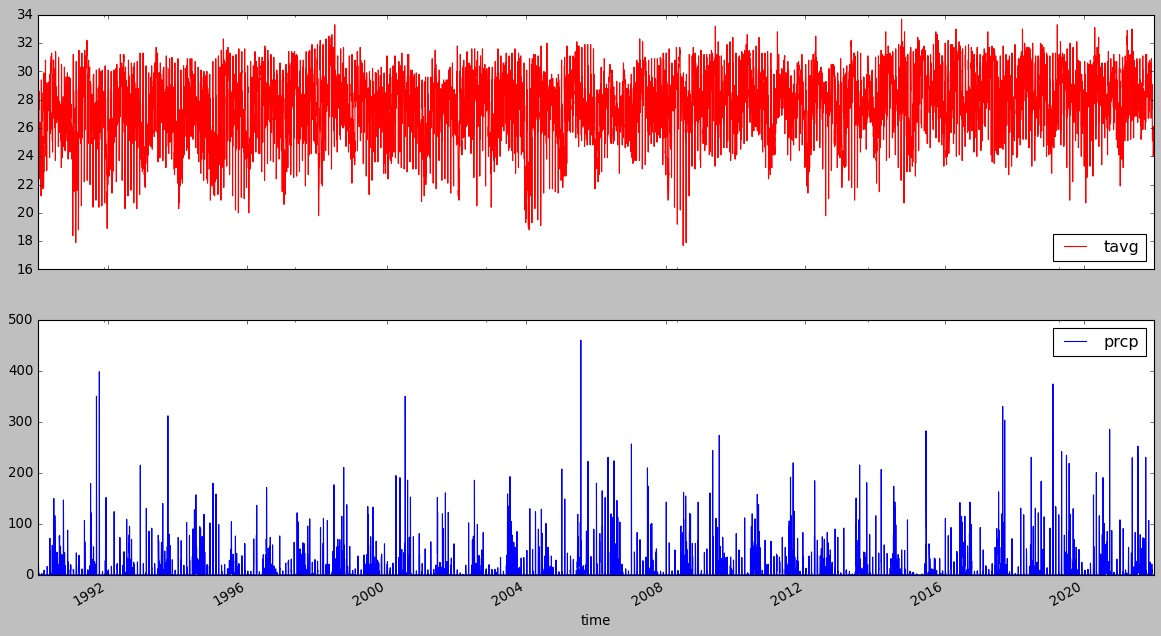

In [20]:
plt.style.use('classic')
df1[['tavg','prcp']].plot(subplots=True, figsize=(18,10),color=("red","blue"));

##### Observation
- Data looks compressed so I will make a df with mean values yearwise

In [21]:
years = df1.groupby(df1.index.year).mean()
years.head()

,tavg,tmin,tmax,prcp,year,month
time,,,,,,
1990,27.114521,22.810411,31.773973,7.116164,1990.0,6.526027
1991,26.942466,22.426575,31.886301,6.001370,1991.0,6.526027
1992,27.109836,22.677869,32.050546,5.228962,1992.0,6.513661
1993,27.164932,22.961096,31.902466,6.569589,1993.0,6.526027
1994,26.951233,22.575616,31.853151,6.726301,1994.0,6.526027


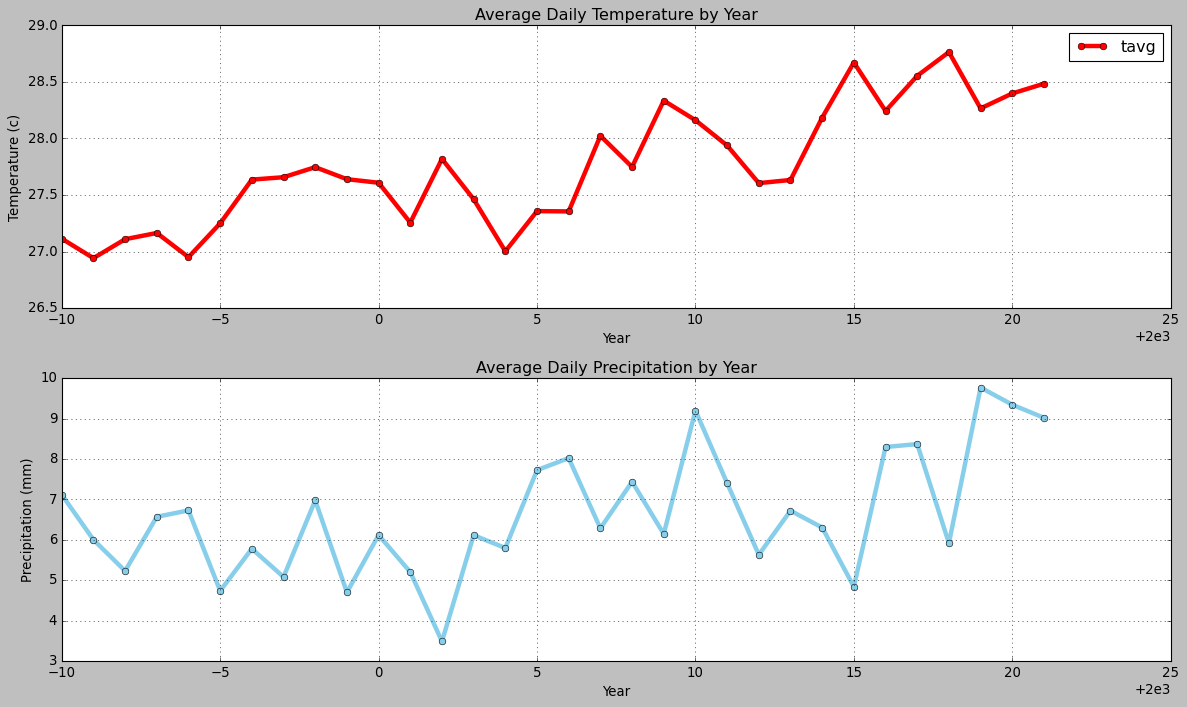

In [22]:
f, axes = plt.subplots(nrows = 2, figsize =(15,9))
ax = years[['tavg']].plot(ax=axes[0],color="red",marker='o',linewidth=4)
ax.set_ylabel('Temperature (c)')
ax.set_xlabel('Year')
ax.set_title('Average Daily Temperature by Year')
ax.grid()
ax = years['prcp'].plot(ax=axes[1],color="skyblue",marker='o',linewidth=4)
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Year')
ax.set_title('Average Daily Precipitation by Year')
ax.grid()

plt.tight_layout()

##### Observations
- The average temperature in mumbai is is increasing by a small margin since 1990. 
- Precipitation has a negative trend past the year 2015

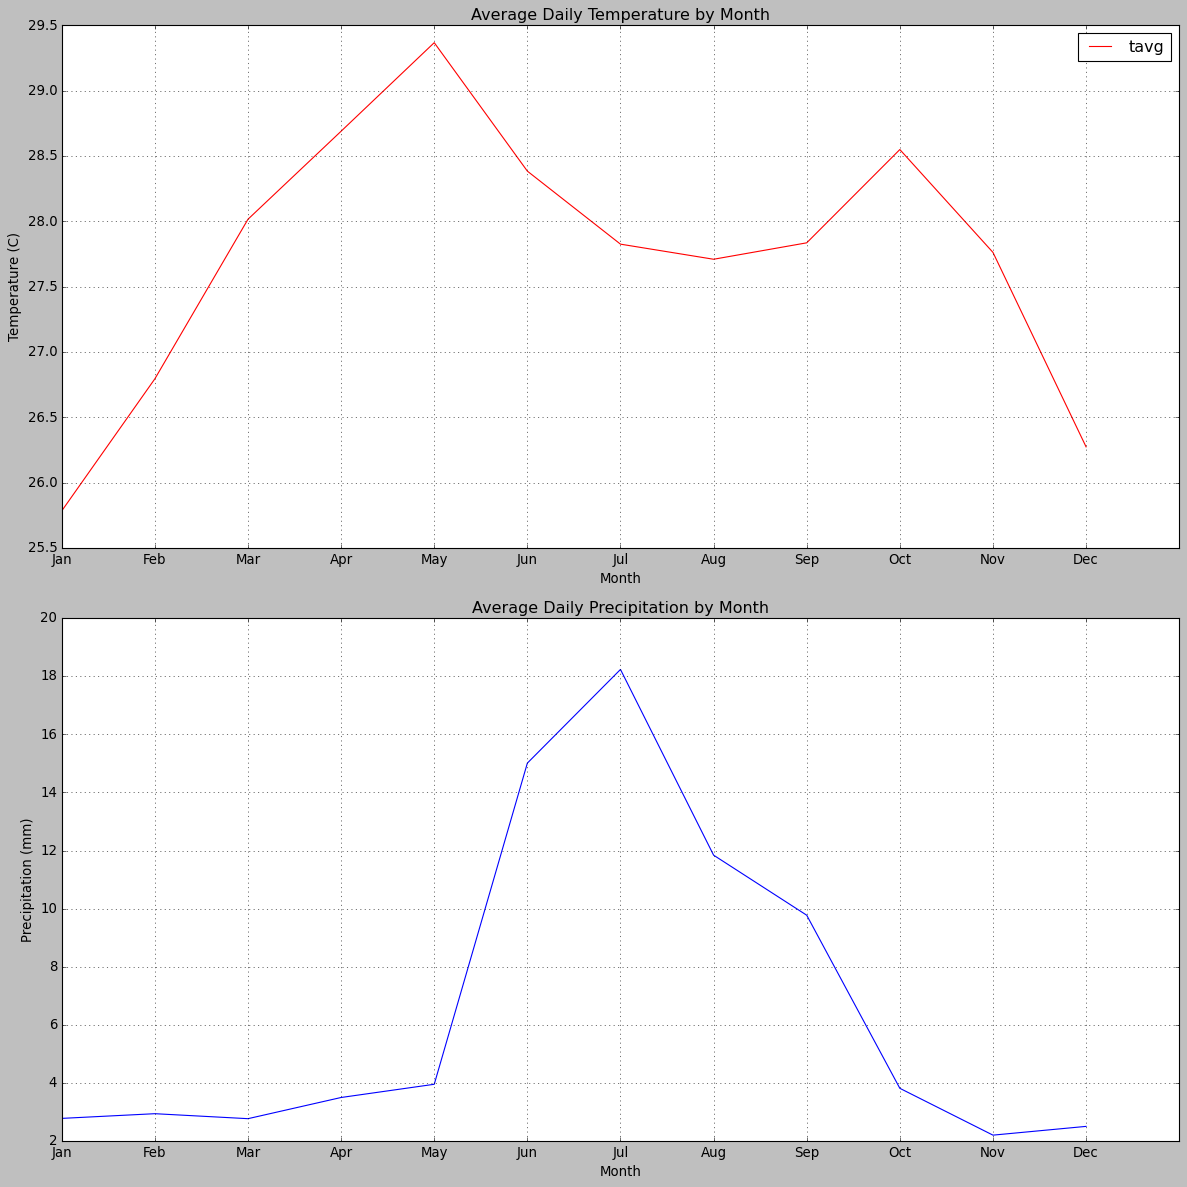

In [23]:
#Monthwise
months = ['Jan','Feb','Mar','Apr','May','Jun',
          'Jul','Aug','Sep','Oct','Nov','Dec']

data = df1.groupby(df1.index.month, as_index=False)[['tavg','tmin','tmax','prcp']].mean()

f, axes = plt.subplots(nrows=2, figsize=(15,15))
ax = data[['tavg']].plot(ax=axes[0],color="red")
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Temperature by Month')
ax.grid()

ax = data['prcp'].plot(ax=axes[1]);
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Precipitation by Month')
ax.grid()

plt.tight_layout()


In [24]:
month_df = df1.groupby(['year','month'], as_index=False)[['tavg','prcp']].mean()

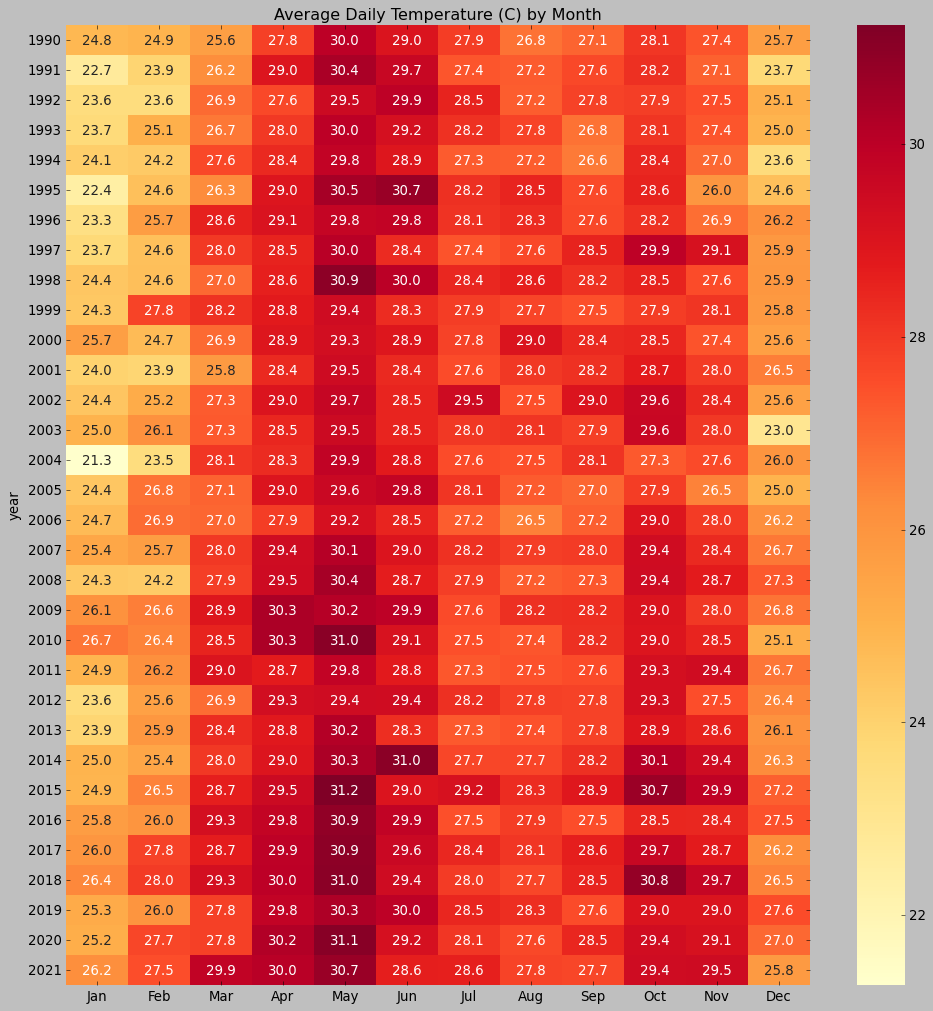

In [25]:
data = month_df.pivot('year','month','tavg')
data.columns = months

plt.subplots(figsize=(15,15))
sns.heatmap(data, cmap='YlOrRd',annot=True, fmt='.1f')
plt.title('Average Daily Temperature (C) by Month')
plt.yticks(rotation=0)
plt.show()

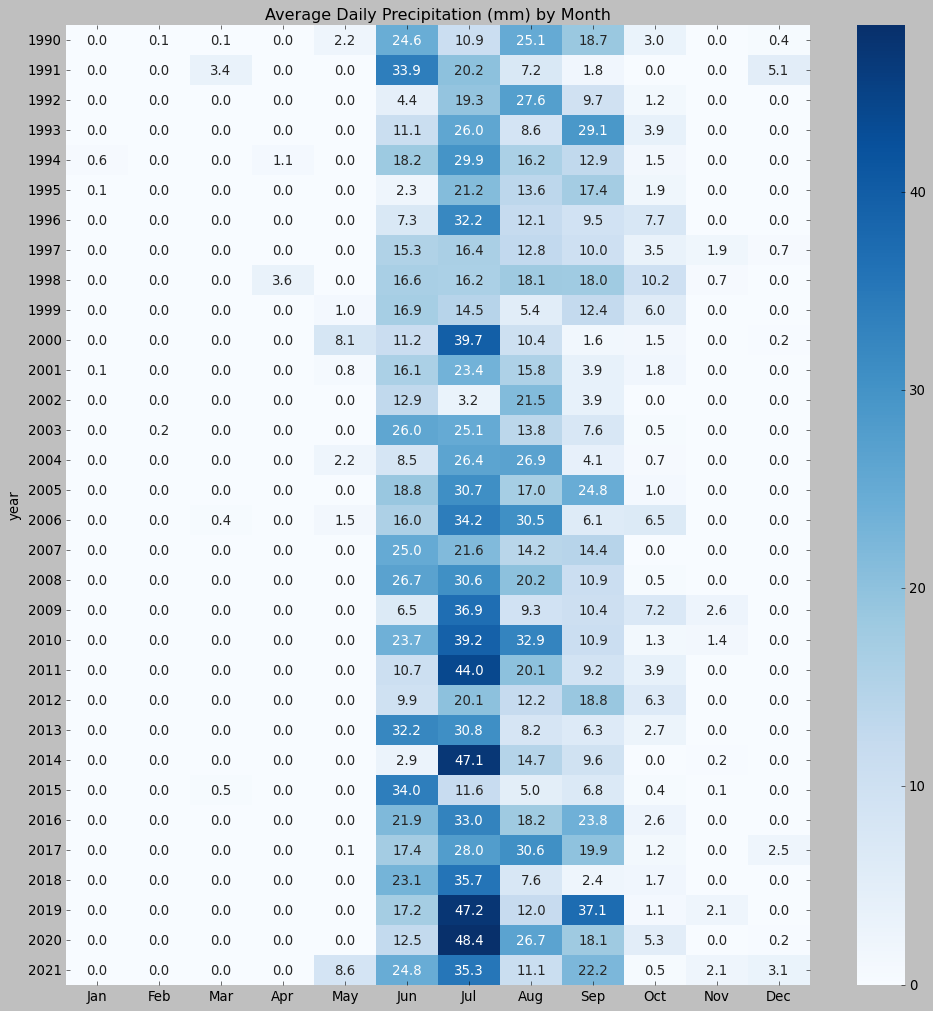

In [26]:
data = month_df.pivot('year','month','prcp')
data.columns = months

plt.subplots(figsize=(15,15))
sns.heatmap(data,cmap='Blues',annot=True, fmt='.1f')
plt.title('Average Daily Precipitation (mm) by Month')
plt.yticks(rotation=0)
plt.show()

##### Observations
- May and October are the months with high temperature throughout the year.
- Throughout dataset hotter months are found to be March,April, May and Oct.
- July is the month with high precipitation.
- Throughout the year 2019, the average rainfall was the highest.
- Abnormal rainfall in feb of 2019.

.

### - Data preparation for model building

In [27]:
# Creating dataframe for year and yearwise tmax
yearwise_tmax=(df1.groupby('year').agg({'tmax':'max'}))
B={"year":yearwise_tmax.index.values[0:]}
years=pd.DataFrame(B)

# Replacing the index of yearwise tmax from years to 0:32
index = pd.Index([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
yearwise_tmax=yearwise_tmax.set_index(index,drop=True, append=False, inplace=False, verify_integrity=False)

# Concatinating yearwise tmax and years column because correlation wrt index was not possible
result=pd.concat([years,yearwise_tmax],axis=1,join="outer")
result.head()

,year,tmax
0,1990,37.2
1,1991,38.7
2,1992,38.2
3,1993,39.0
4,1994,36.2


In [28]:

yearwise_tmin=(df1.groupby('year').agg({'tmin':'min'}))
yearwise_tmin=yearwise_tmin.set_index(index,drop=True, append=False, inplace=False, verify_integrity=False)
yearwise_tavg=(df1.groupby('year').agg({'tavg':'mean'}))
yearwise_tavg=yearwise_tavg.set_index(index,drop=True, append=False, inplace=False, verify_integrity=False)
yearwise_prcp=(df1.groupby('year').agg({'prcp':'mean'}))
yearwise_prcp=yearwise_prcp.set_index(index,drop=True, append=False, inplace=False, verify_integrity=False)

# Concatinating yearwise tmax and years column because correlation wrt index was not possible
result=pd.concat([result,yearwise_tmin,yearwise_tavg,yearwise_prcp],axis=1,join="outer")
result.head()

,year,tmax,tmin,tavg,prcp
0,1990,37.2,10.5,27.114521,7.116164
1,1991,38.7,10.0,26.942466,6.001370
2,1992,38.2,12.8,27.109836,5.228962
3,1993,39.0,14.1,27.164932,6.569589
4,1994,36.2,11.8,26.951233,6.726301


In [29]:
test=result.copy()
test["year"]=pd.to_datetime(test["year"],infer_datetime_format=True)

In [30]:
tavg = test.set_index(["year"])
tavg.drop(["tmin","tmax","prcp"],axis=1,inplace=True)

In [31]:
tavg.head()

,tavg
year,
1970-01-01 00:00:00.000001990,27.114521
1970-01-01 00:00:00.000001991,26.942466
1970-01-01 00:00:00.000001992,27.109836
1970-01-01 00:00:00.000001993,27.164932
1970-01-01 00:00:00.000001994,26.951233


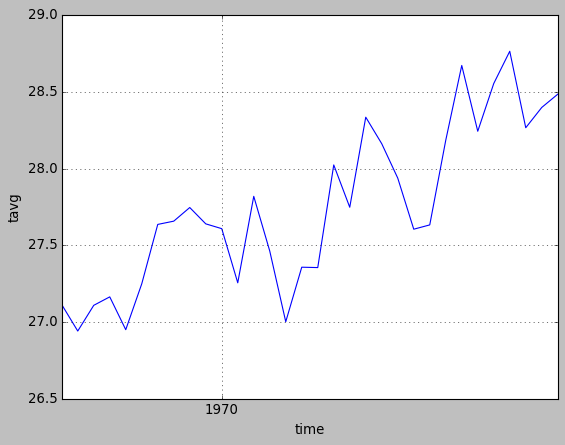

In [32]:
## plot graph

plt.xlabel("time")
plt.ylabel("tavg")
plt.plot(tavg)
plt.grid()


In [33]:
result.corr()

,year,tmax,tmin,tavg,prcp
year,1.000000,0.292093,0.081010,0.839511,0.525171
tmax,0.292093,1.000000,0.007343,0.361358,-0.087925
tmin,0.081010,0.007343,1.000000,0.126773,-0.053758
tavg,0.839511,0.361358,0.126773,1.000000,0.343617
prcp,0.525171,-0.087925,-0.053758,0.343617,1.000000


## Simple linear regression model 
### To find yearly average temperature increase

In [34]:
import statsmodels.api as sm

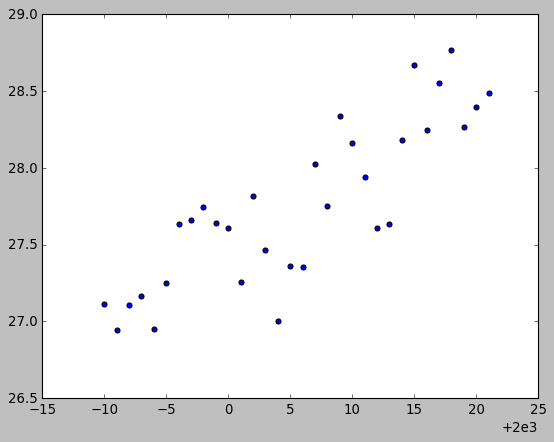

In [35]:
y=result['tavg']
x=result['year']

plt.scatter(x,y)

In [36]:
x1=sm.add_constant(x)

model1 = sm.OLS(y,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tavg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.92e-09
Time:                        20:19:00   Log-Likelihood:                -5.2016
No. Observations:                  32   AIC:                             14.40
Df Residuals:                      30   BIC:                             17.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.7870     11.290     -6.004      0.000     -90.843     -44.731
year           0.0476      0.006      8.463      0.000       0.036       0.059
==============================================================================
Omnibus:                        1.122   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.109
Skew:                          -0.381   Prob(JB):                        0.574
Kurtosis:                       2.499   Cond. No.                     4.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
yhat=-67.7870+0.0476*x
yhat.head()

0    26.9370
1    26.9846
2    27.0322
3    27.0798
4    27.1274
Name: year, dtype: float64

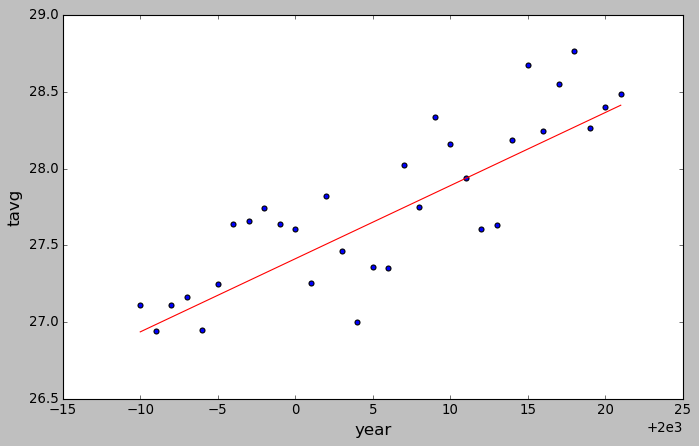

In [38]:
fig=plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,yhat,c="red")
plt.xlabel("year",fontsize=15)
plt.ylabel("tavg",fontsize=15)
plt.show()

### - Model validation

#### This model is good fit for the data so further we will split our data into two parts i.e Train data and Test data to check accuracy of model.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

x1=result.drop(["tmax","tmin","tavg","prcp"],axis=1)    # created two separate datframes 
y1=result.drop(["tmax","tmin","year","prcp"],axis=1)

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30) # splited the data into train data and test(30%) data.

lr.fit(x1_train,y1_train)  # fitted the model

LinearRegression()

In [41]:
print(x1_test)     # test data (years)

prediction=lr.predict(x1_test)  # predicted temperature of years in test data
prediction

    year
21  2011
31  2021
23  2013
27  2017
19  2009
14  2004
0   1990
25  2015
29  2019
11  2001


array([[28.02066845],
       [28.47974061],
       [28.11248288],
       [28.29611175],
       [27.92885402],
       [27.69931794],
       [27.05661692],
       [28.20429732],
       [28.38792618],
       [27.56159629]])

In [42]:
print("Training accuracy is : ",lr.score(x1_train,y1_train))
print("Testing accuracy is : ",lr.score(x1_test,y1_test))

Training accuracy is :  0.7212778176071584
Testing accuracy is :  0.6427857675482949


### This linear regression model gives us 63% accuracy test data.

.

.

### Trying to apply MLR by taking precipitation as a target.

In [43]:
import statsmodels.formula.api as smf

In [44]:
model = smf.ols("prcp~tmin+tmax+tavg+year",data =result).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prcp   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3.844
Date:                Sun, 25 Dec 2022   Prob (F-statistic):             0.0134
Time:                        20:19:00   Log-Likelihood:                -50.995
No. Observations:                  32   AIC:                             112.0
Df Residuals:                      27   BIC:                             119.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -219.0769     74.073     -2.958      0.006    -371.061     -67.092
tmin          -0.0636      0.112     -0.567      0.576      -0.294       0.167
tmax          -0.2732      0.190     -1.441      0.161      -0.662       0.116
tavg          -0.6221      0.831     -0.748      0.461      -2.328       1.084
year           0.1269      0.046      2.773      0.010       0.033       0.221
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.527
Skew:                          -0.244   Prob(JB):                        0.768
Kurtosis:                       2.604   Cond. No.                     6.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model1 = smf.ols("prcp~tavg+years+tmin",data= result).fit()

In [47]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prcp   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4.270
Date:                Sun, 25 Dec 2022   Prob (F-statistic):             0.0133
Time:                        20:19:00   Log-Likelihood:                -52.181
No. Observations:                  32   AIC:                             112.4
Df Residuals:                      28   BIC:                             118.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -225.4962     75.346     -2.993      0.006    -379.836     -71.157
tavg          -0.8938      0.825     -1.083      0.288      -2.584       0.797
years          0.1285      0.047      2.756      0.010       0.033       0.224
tmin          -0.0567      0.114     -0.496      0.624      -0.291       0.177
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.828
Skew:                          -0.232   Prob(JB):                        0.661
Kurtosis:                       2.363   Cond. No.                     6.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model2 = smf.ols("prcp~tavg+years",data= result).fit()

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prcp   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     6.449
Date:                Sun, 25 Dec 2022   Prob (F-statistic):            0.00482
Time:                        20:19:00   Log-Likelihood:                -52.321
No. Observations:                  32   AIC:                             110.6
Df Residuals:                      29   BIC:                             115.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -227.1566     74.287     -3.058      0.005    -379.090     -75.223
tavg          -0.9382      0.810     -1.159      0.256      -2.594       0.718
years          0.1296      0.046      2.820      0.009       0.036       0.224
==============================================================================
Omnibus:                        1.109   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.934
Skew:                          -0.166   Prob(JB):                        0.627
Kurtosis:                       2.232   Cond. No.                     6.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model3 = smf.ols("prcp~tavg",data= result).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prcp   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.016
Date:                Sun, 25 Dec 2022   Prob (F-statistic):             0.0542
Time:                        20:19:00   Log-Likelihood:                -56.198
No. Observations:                  32   AIC:                             116.4
Df Residuals:                      30   BIC:                             119.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.5288     13.552     -1.515      0.140     -48.206       7.148
tavg           0.9784      0.488      2.004      0.054      -0.019       1.976
==============================================================================
Omnibus:                        0.368   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.525
Skew:                          -0.185   Prob(JB):                        0.769
Kurtosis:                       2.494   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model4 = smf.ols("prcp~years",data= result).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prcp   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     11.43
Date:                Sun, 25 Dec 2022   Prob (F-statistic):            0.00203
Time:                        20:19:00   Log-Likelihood:                -53.045
No. Observations:                  32   AIC:                             110.1
Df Residuals:                      30   BIC:                             113.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -163.5594     50.349     -3.248      0.003    -266.387     -60.732
years          0.0849      0.025      3.380      0.002       0.034       0.136
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.967
Skew:                          -0.303   Prob(JB):                        0.616
Kurtosis:                       2.402   Cond. No.                     4.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model5 = smf.ols("prcp~tavg+year",data= result).fit()

In [54]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prcp   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     6.449
Date:                Sun, 25 Dec 2022   Prob (F-statistic):            0.00482
Time:                        20:19:00   Log-Likelihood:                -52.321
No. Observations:                  32   AIC:                             110.6
Df Residuals:                      29   BIC:                             115.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -227.1566     74.287     -3.058      0.005    -379.090     -75.223
tavg          -0.9382      0.810     -1.159      0.256      -2.594       0.718
year           0.1296      0.046      2.820      0.009       0.036       0.224
==============================================================================
Omnibus:                        1.109   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.934
Skew:                          -0.166   Prob(JB):                        0.627
Kurtosis:                       2.232   Cond. No.                     6.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### According to above model summaries we came to a conclusion that MLR model would not be a great fir for the data

## <font color=blue>**Now, we are trying to fit TimeSeries Model on this dataset**</font>

### - Data preparation for TimeSeries model 

In [55]:
df1.head()

,tavg,tmin,tmax,prcp,year,month,month-year
time,,,,,,,
1990-01-01,23.2,17.0,29.9,0.0,1990,1,01-1990
1990-02-01,22.2,16.5,29.9,0.0,1990,1,01-1990
1990-03-01,21.8,16.3,30.7,0.0,1990,1,01-1990
1990-04-01,25.4,17.9,31.8,0.0,1990,1,01-1990
1990-05-01,26.5,19.3,33.7,0.0,1990,1,01-1990


In [56]:
y1 = (df3[df3["year"] == 1990]).groupby("month-year").mean()
y2 = (df3[df3["year"] == 1991]).groupby("month-year").mean()
y3 = (df3[df3["year"] == 1992]).groupby("month-year").mean()
y4 = (df3[df3["year"] == 1993]).groupby("month-year").mean()
y5 = (df3[df3["year"] == 1994]).groupby("month-year").mean()
y6 = (df3[df3["year"] == 1995]).groupby("month-year").mean()
y7 = (df3[df3["year"] == 1996]).groupby("month-year").mean()
y8 = (df3[df3["year"] == 1997]).groupby("month-year").mean()
y9 = (df3[df3["year"] == 1998]).groupby("month-year").mean()
y10 = (df3[df3["year"] == 1999]).groupby("month-year").mean()
y11= (df3[df3["year"] == 2000]).groupby("month-year").mean()
y12 = (df3[df3["year"] == 2001]).groupby("month-year").mean()
y13 = (df3[df3["year"] == 2002]).groupby("month-year").mean()
y14 = (df3[df3["year"] == 2003]).groupby("month-year").mean()
y15 = (df3[df3["year"] == 2004]).groupby("month-year").mean()
y16 = (df3[df3["year"] == 2005]).groupby("month-year").mean()
y17 = (df3[df3["year"] == 2006]).groupby("month-year").mean()
y18 = (df3[df3["year"] == 2007]).groupby("month-year").mean()
y19 = (df3[df3["year"] == 2008]).groupby("month-year").mean()
y20 = (df3[df3["year"] == 2009]).groupby("month-year").mean()
y21 = (df3[df3["year"] == 2010]).groupby("month-year").mean()
y22 = (df3[df3["year"] == 2011]).groupby("month-year").mean()
y23= (df3[df3["year"] == 2012]).groupby("month-year").mean()
y24= (df3[df3["year"] == 2013]).groupby("month-year").mean()
y25= (df3[df3["year"] == 2014]).groupby("month-year").mean()
y26= (df3[df3["year"] == 2015]).groupby("month-year").mean()
y27= (df3[df3["year"] == 2016]).groupby("month-year").mean()
y28= (df3[df3["year"] == 2017]).groupby("month-year").mean()
y29= (df3[df3["year"] == 2018]).groupby("month-year").mean()
y30= (df3[df3["year"] == 2019]).groupby("month-year").mean()
y31 = (df3[df3["year"] == 2020]).groupby("month-year").mean()
y32 = (df3[df3["year"] == 2021]).groupby("month-year").mean()

In [57]:
ym = pd.concat([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32], axis=0)

In [58]:
ym.head()
ym2=ym.copy()

In [59]:
ym2.head()

,tavg,tmin,tmax,prcp,year,month
month-year,,,,,,
01-1990,24.841935,17.170968,33.593548,0.000000,1990.0,1.0
02-1990,24.950000,18.800000,31.685714,0.100000,1990.0,2.0
03-1990,25.645161,20.629032,31.016129,0.090323,1990.0,3.0
04-1990,27.846667,23.086667,32.253333,0.000000,1990.0,4.0
05-1990,29.970968,27.109677,32.932258,2.245161,1990.0,5.0


In [60]:
ym2=ym2.reset_index()
ym2.head()

,month-year,tavg,tmin,tmax,prcp,year,month
0,01-1990,24.841935,17.170968,33.593548,0.000000,1990.0,1.0
1,02-1990,24.950000,18.800000,31.685714,0.100000,1990.0,2.0
2,03-1990,25.645161,20.629032,31.016129,0.090323,1990.0,3.0
3,04-1990,27.846667,23.086667,32.253333,0.000000,1990.0,4.0
4,05-1990,29.970968,27.109677,32.932258,2.245161,1990.0,5.0


.

# Temperature with respect to time 

In [61]:
temp_avg=ym2.drop(['tmin','tmax','prcp','year','month'],axis=1)
temp_avg.head()

,month-year,tavg
0,01-1990,24.841935
1,02-1990,24.950000
2,03-1990,25.645161
3,04-1990,27.846667
4,05-1990,29.970968


In [62]:
temp_avg['month-year']=pd.to_datetime(temp_avg['month-year'])
temp_avg.head(5)

,month-year,tavg
0,1990-01-01,24.841935
1,1990-02-01,24.950000
2,1990-03-01,25.645161
3,1990-04-01,27.846667
4,1990-05-01,29.970968


In [63]:
temp_avg.set_index('month-year',inplace=True)
temp_avg.head()

,tavg
month-year,
1990-01-01,24.841935
1990-02-01,24.950000
1990-03-01,25.645161
1990-04-01,27.846667
1990-05-01,29.970968


<AxesSubplot:xlabel='month-year'>

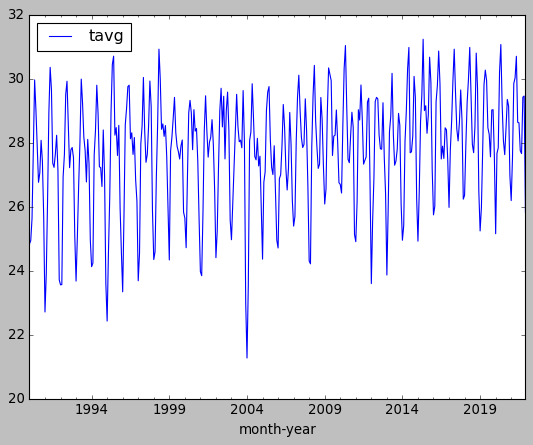

In [64]:
temp_avg.plot()

In [65]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(temp_avg['tavg'])

In [66]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(tavg):
    result=adfuller(tavg)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [67]:
adfuller_test(temp_avg['tavg'])

ADF Test Statistic : -2.014538614785058
p-value : 0.28023503027677765
#Lags Used : 14
Number of Observations Used : 369
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


##### Differencing

In [68]:
temp_avg['tavg First Diff'] = temp_avg['tavg'] - temp_avg['tavg'].shift(1)

In [69]:
temp_avg['tavg'].shift(1)

month-year
1990-01-01          NaN
1990-02-01    24.841935
1990-03-01    24.950000
1990-04-01    25.645161
1990-05-01    27.846667
                ...    
2021-08-01    28.632258
2021-09-01    27.758065
2021-10-01    27.670000
2021-11-01    29.432258
2021-12-01    29.466667
Name: tavg, Length: 384, dtype: float64

In [70]:
temp_avg['Seasonal tavg First Diff']=temp_avg['tavg']-temp_avg['tavg'].shift(12)

In [71]:
temp_avg.head(20)

,tavg,tavg First Diff,Seasonal tavg First Diff
month-year,,,
1990-01-01,24.841935,NaN,NaN
1990-02-01,24.950000,0.108065,NaN
1990-03-01,25.645161,0.695161,NaN
1990-04-01,27.846667,2.201505,NaN
1990-05-01,29.970968,2.124301,NaN
1990-06-01,29.033333,-0.937634,NaN
1990-07-01,27.916129,-1.117204,NaN
1990-08-01,26.770968,-1.145161,NaN
1990-09-01,27.066667,0.295699,NaN


In [72]:
## Again test dickey fuller test
adfuller_test(temp_avg['Seasonal tavg First Diff'].dropna())

ADF Test Statistic : -6.620400910645945
p-value : 6.057403843845134e-09
#Lags Used : 13
Number of Observations Used : 358
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='month-year'>

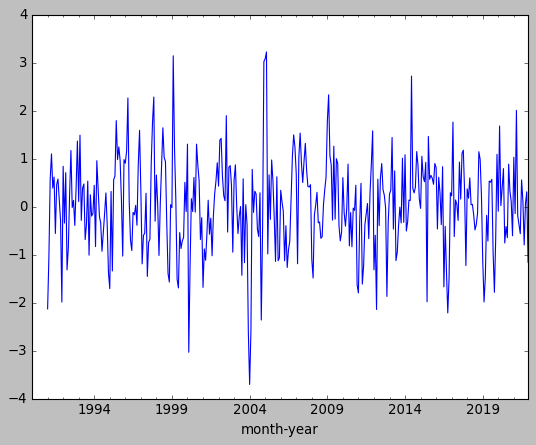

In [73]:
temp_avg['Seasonal tavg First Diff'].plot()

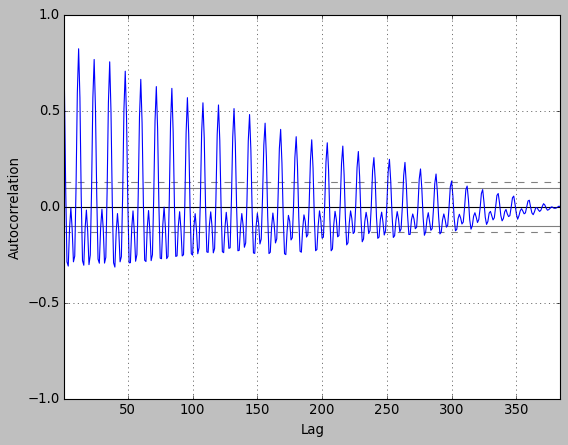

In [74]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp_avg['tavg'])
plt.show()

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


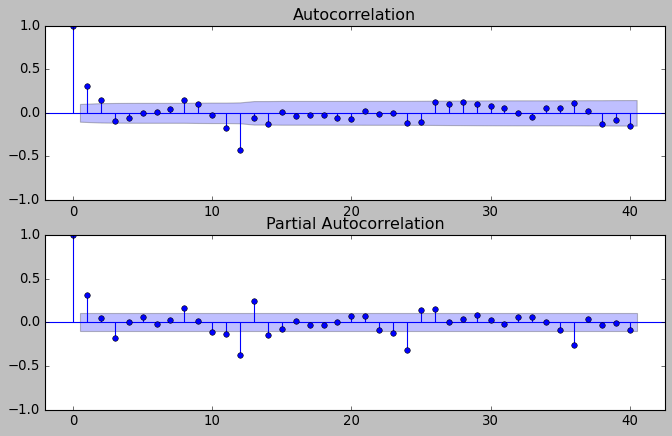

In [76]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp_avg['Seasonal tavg First Diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp_avg['Seasonal tavg First Diff'].iloc[13:],lags=40,ax=ax2)

In [77]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

# import statsmodels.tsa.arima_model
from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.arima.ARIMA(temp_avg['tavg'],order=(1,1,1))
model_fit=model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [78]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tavg   No. Observations:                  384
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -680.023
Date:                Sun, 25 Dec 2022   AIC                           1366.047
Time:                        20:19:01   BIC                           1377.891
Sample:                    01-01-1990   HQIC                          1370.745
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0335      0.171      0.196      0.844      -0.301       0.368
ma.L1          0.2912      0.155      1.876      0.061      -0.013       0.595
sigma2         2.0399      0.160     12.714      0.000       1.725       2.354
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.93   Prob(JB):                         0.59
Heteroskedasticity (H):               1.00   Skew:                             0.02
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='month-year'>

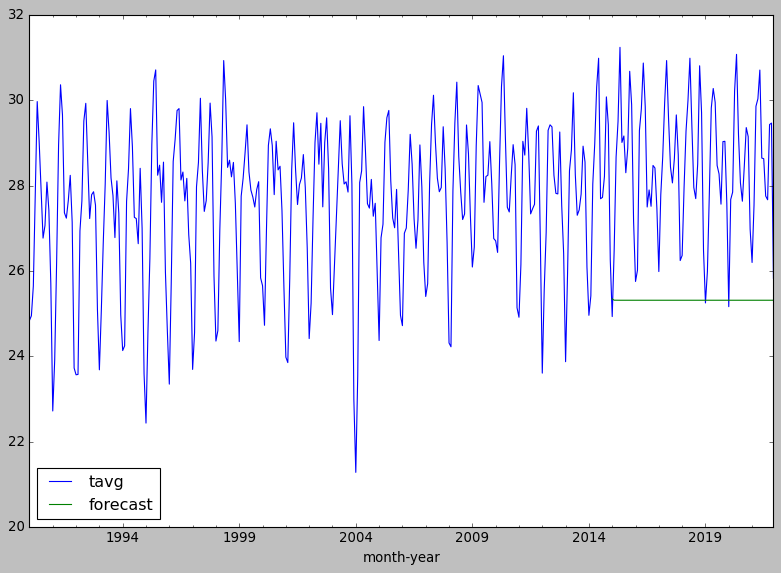

In [79]:
temp_avg['forecast']=model_fit.predict(start=300,end=383,dynamic=True)
temp_avg[['tavg','forecast']].plot(figsize=(12,8))

In [80]:
model1=sm.tsa.statespace.SARIMAX(temp_avg['tavg'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model1.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='month-year'>

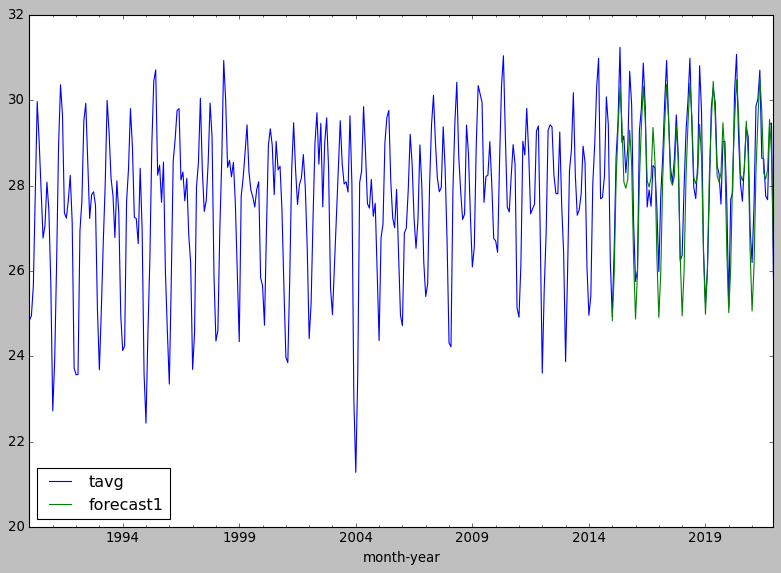

In [81]:
temp_avg['forecast1']=results.predict(start=300,end=383,dynamic=True)
temp_avg[['tavg','forecast1']].plot(figsize=(12,8))

In [82]:
from pandas.tseries.offsets import DateOffset
future_dates=[temp_avg.index[-1]+ DateOffset(months=x)for x in range(0,37)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=temp_avg.columns)

future_datest_df.tail()

,tavg,tavg First Diff,Seasonal tavg First Diff,forecast,forecast1
2024-08-01,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN,NaN,NaN


In [83]:
future_datest_df.shape

(36, 5)

In [84]:
future_df=pd.concat([temp_avg,future_datest_df])

<AxesSubplot:>

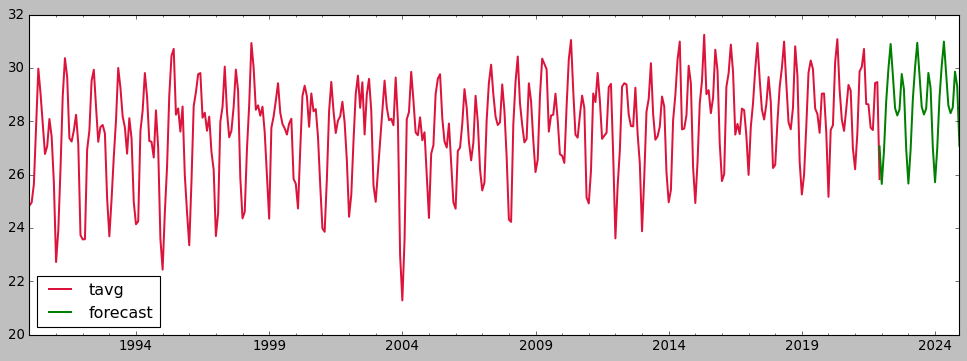

In [85]:
future_df['forecast'] = results.predict(start = 383, end =419 , dynamic= True)  
future_df[['tavg', 'forecast']].plot(figsize=(15,5),linewidth=1.8,color=("crimson","green"))

In [86]:
future_df[['tavg', 'forecast']].tail(36)

,tavg,forecast
2022-01-01,NaN,25.647635
2022-02-01,NaN,26.889649
2022-03-01,NaN,28.743790
2022-04-01,NaN,29.963699
2022-05-01,NaN,30.896451
2022-06-01,NaN,29.734839
2022-07-01,NaN,28.489007
2022-08-01,NaN,28.217342
2022-09-01,NaN,28.443301
2022-10-01,NaN,29.770529


.

# Precipitation with respect to time.

Ho : There is no significant difference in precipitation with respect to time.

H1 : There is significant difference in precipitation with respect to time.

In [87]:
prcp=ym2.drop(['tmin','tmax','tavg','year','month'],axis=1)
prcp.head()

,month-year,prcp
0,01-1990,0.000000
1,02-1990,0.100000
2,03-1990,0.090323
3,04-1990,0.000000
4,05-1990,2.245161


In [88]:
prcp['month-year']=pd.to_datetime(prcp['month-year'])
prcp.head(5)

,month-year,prcp
0,1990-01-01,0.000000
1,1990-02-01,0.100000
2,1990-03-01,0.090323
3,1990-04-01,0.000000
4,1990-05-01,2.245161


In [89]:
prcp.set_index('month-year',inplace=True)
prcp.head()

,prcp
month-year,
1990-01-01,0.000000
1990-02-01,0.100000
1990-03-01,0.090323
1990-04-01,0.000000
1990-05-01,2.245161


<AxesSubplot:xlabel='month-year'>

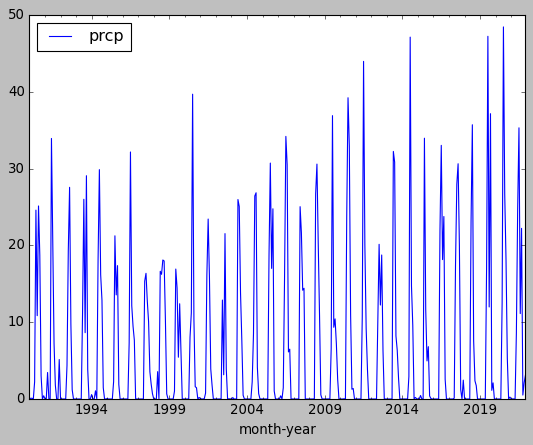

In [90]:
prcp.plot()

In [91]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(prcp['prcp'])

In [92]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(prcp):
    result=adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [93]:
adfuller_test(prcp['prcp'])

ADF Test Statistic : -3.4962472841666847
p-value : 0.008083996426271854
#Lags Used : 12
Number of Observations Used : 371
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Therefore, We can conclude that there is significant difference in precipitation with respect to time.

In [94]:
prcp['prcp First Diff'] = prcp['prcp'] - prcp['prcp'].shift(1)

In [95]:
prcp['prcp'].shift(1)

month-year
1990-01-01          NaN
1990-02-01     0.000000
1990-03-01     0.100000
1990-04-01     0.090323
1990-05-01     0.000000
                ...    
2021-08-01    35.309677
2021-09-01    11.122581
2021-10-01    22.220000
2021-11-01     0.512903
2021-12-01     2.116667
Name: prcp, Length: 384, dtype: float64

In [96]:
prcp['Seasonal prcp First Diff']=prcp['prcp']-prcp['prcp'].shift(12)

<AxesSubplot:xlabel='month-year'>

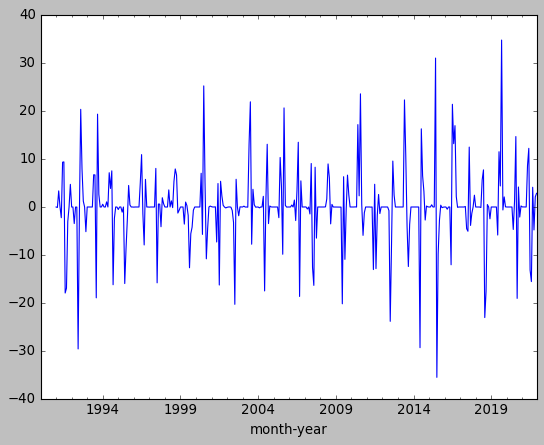

In [97]:
prcp['Seasonal prcp First Diff'].plot()

In [98]:
prcp.head(20)

,prcp,prcp First Diff,Seasonal prcp First Diff
month-year,,,
1990-01-01,0.000000,NaN,NaN
1990-02-01,0.100000,0.100000,NaN
1990-03-01,0.090323,-0.009677,NaN
1990-04-01,0.000000,-0.090323,NaN
1990-05-01,2.245161,2.245161,NaN
1990-06-01,24.593333,22.348172,NaN
1990-07-01,10.851613,-13.741720,NaN
1990-08-01,25.135484,14.283871,NaN
1990-09-01,18.723333,-6.412151,NaN


In [99]:
## Again test dickey fuller test
adfuller_test(prcp['Seasonal prcp First Diff'].dropna())

ADF Test Statistic : -8.132716995709414
p-value : 1.0794258958701881e-12
#Lags Used : 12
Number of Observations Used : 359
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='month-year'>

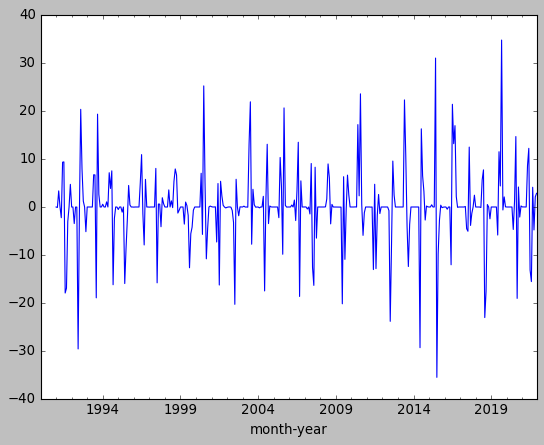

In [100]:
prcp['Seasonal prcp First Diff'].plot()

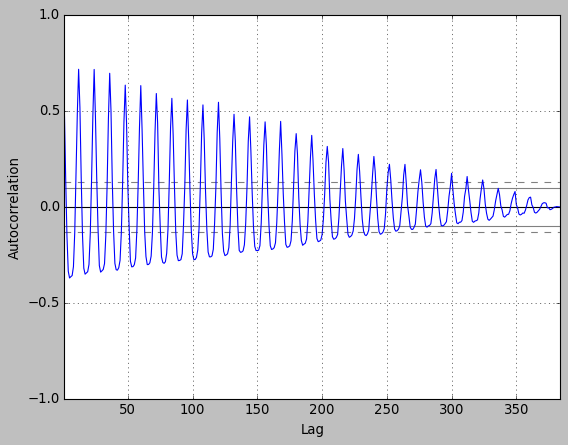

In [101]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(prcp['prcp'])
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


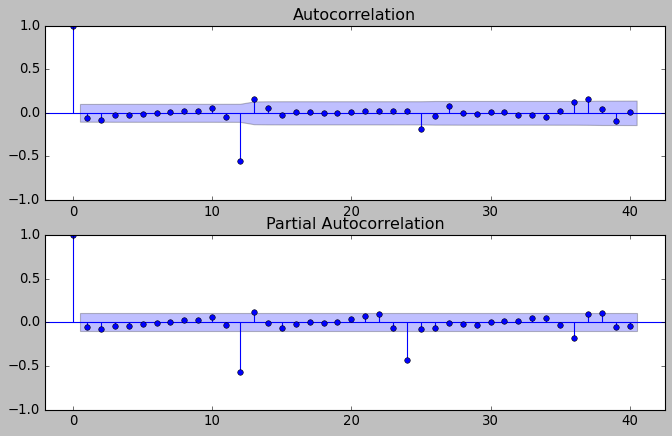

In [102]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(prcp['Seasonal prcp First Diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(prcp['Seasonal prcp First Diff'].iloc[13:],lags=40,ax=ax2)

In [103]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

# import statsmodels.tsa.arima_model
from statsmodels.tsa.arima_model import ARIMA
model2=sm.tsa.arima.ARIMA(prcp['prcp'],order=(1,1,1))
model2_fit=model2.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   prcp   No. Observations:                  384
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1393.560
Date:                Sun, 25 Dec 2022   AIC                           2793.120
Time:                        20:19:07   BIC                           2804.964
Sample:                    01-01-1990   HQIC                          2797.818
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5080      0.050     10.162      0.000       0.410       0.606
ma.L1         -0.9999      1.350     -0.741      0.459      -3.647       1.647
sigma2        83.6486    110.044      0.760      0.447    -132.034     299.331
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):               471.87
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='month-year'>

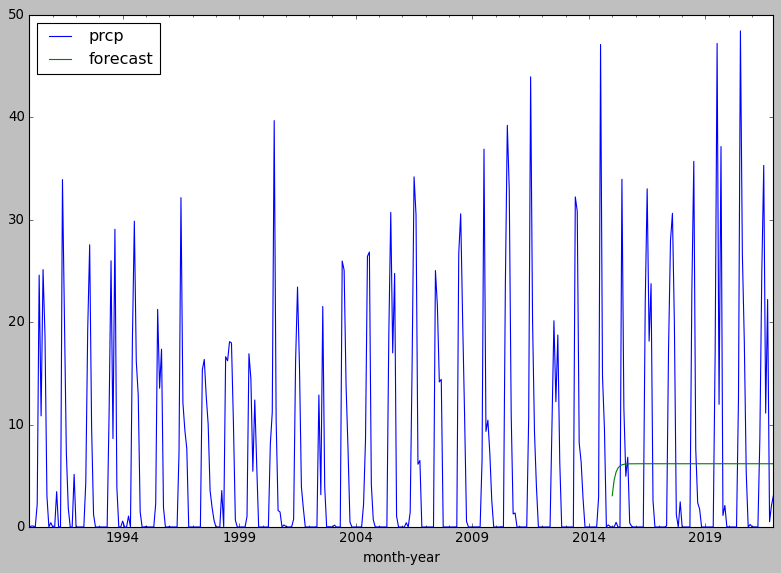

In [105]:
prcp['forecast']=model2_fit.predict(start=300,end=383,dynamic=True)
prcp[['prcp','forecast']].plot(figsize=(12,8))

In [106]:
model2=sm.tsa.statespace.SARIMAX(prcp['prcp'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results2=model2.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='month-year'>

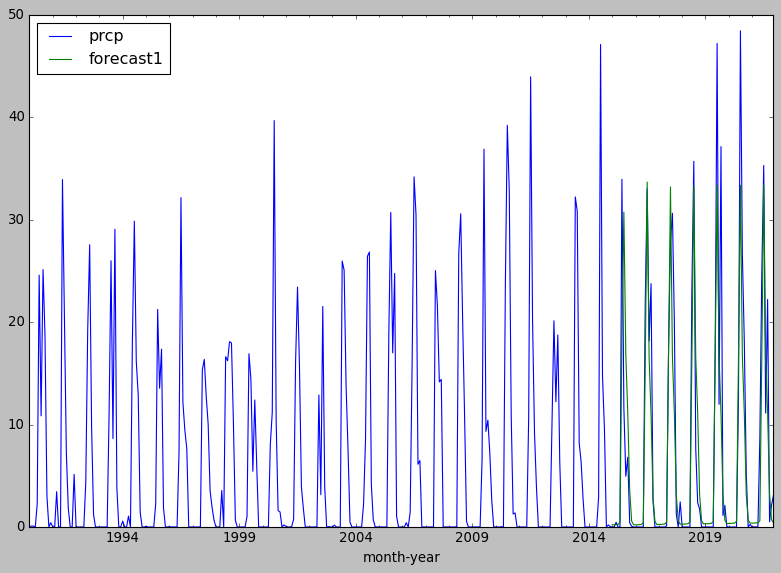

In [107]:
prcp['forecast1']=results2.predict(start=300,end=383,dynamic=True)
prcp[['prcp','forecast1']].plot(figsize=(12,8))

In [108]:
from pandas.tseries.offsets import DateOffset
future_dates2=[prcp.index[-1]+ DateOffset(months=x)for x in range(0,36)]

future_datest_df2=pd.DataFrame(index=future_dates[1:],columns=prcp.columns)

future_datest_df2.tail()

,prcp,prcp First Diff,Seasonal prcp First Diff,forecast,forecast1
2024-08-01,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN,NaN,NaN


In [109]:
future_datest_df2.shape

(36, 5)

In [110]:
future_df2=pd.concat([prcp,future_datest_df2])

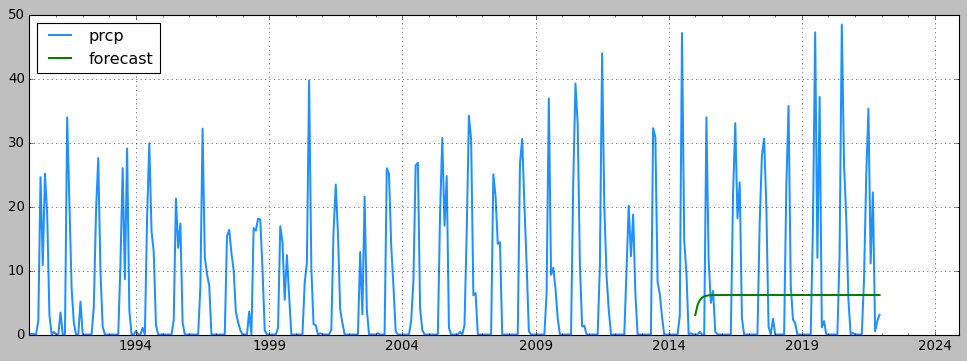

In [111]:
future_df2['prcp_forecast'] = results2.predict(start = 383, end =419, dynamic= True)  
future_df2[['prcp', 'forecast']].plot(figsize=(15,5),linewidth=1.8,color=("dodgerblue","green")).grid()

In [112]:
future_df2[['prcp', 'prcp_forecast']].tail(36)

,prcp,prcp_forecast
2022-01-01,NaN,1.099974
2022-02-01,NaN,1.098779
2022-03-01,NaN,1.134713
2022-04-01,NaN,1.106759
2022-05-01,NaN,1.247798
2022-06-01,NaN,19.283962
2022-07-01,NaN,37.663411
2022-08-01,NaN,18.374140
2022-09-01,NaN,17.938562
2022-10-01,NaN,3.608330


In [113]:
future_df2.head()

,prcp,prcp First Diff,Seasonal prcp First Diff,forecast,forecast1,prcp_forecast
1990-01-01,0.000000,NaN,NaN,NaN,NaN,NaN
1990-02-01,0.100000,0.100000,NaN,NaN,NaN,NaN
1990-03-01,0.090323,-0.009677,NaN,NaN,NaN,NaN
1990-04-01,0.000000,-0.090323,NaN,NaN,NaN,NaN
1990-05-01,2.245161,2.245161,NaN,NaN,NaN,NaN


In [114]:
forecast=future_df2.tail(36)['prcp_forecast']
forecast1=future_df.tail(36)['forecast']

In [115]:
forecast=pd.DataFrame(forecast)
forecast1=pd.DataFrame(forecast1)

In [116]:
forecast=pd.concat([forecast1,forecast], axis=1, join='inner')

### -  FINAL RESULT OF TIME SERIES MODEL (Forcasted temperature and precipitation  of next 3 years )

In [117]:
forecast

,forecast,prcp_forecast
2022-01-01,25.647635,1.099974
2022-02-01,26.889649,1.098779
2022-03-01,28.743790,1.134713
2022-04-01,29.963699,1.106759
2022-05-01,30.896451,1.247798
2022-06-01,29.734839,19.283962
2022-07-01,28.489007,37.663411
2022-08-01,28.217342,18.374140
2022-09-01,28.443301,17.938562
2022-10-01,29.770529,3.608330
